# Homework: 
    1) MovieLens dataset https://grouplens.org/datasets/movielens/1m/
    2) Choose hybrid system
    3) Write your own

In [2]:
import numpy as np
from lightfm.datasets import fetch_movielens
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
import matplotlib.pyplot as plt

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [3]:
#Read data set MovieLens

movielens = fetch_movielens(min_rating=0.5)

train = movielens["train"]
test = movielens["test"]

print('The dataset has %s users and %s items, '
      'with %s interactions in the test and %s interactions in the training set.'
      % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))

The dataset has 943 users and 1682 items, with 9430 interactions in the test and 90570 interactions in the training set.


In [4]:
#Compare BPR and WARP models AUC

model_bpr = LightFM(learning_rate=0.05, learning_schedule="adagrad", loss="bpr")
model_warp = LightFM(learning_rate=0.05, learning_schedule="adagrad", loss="warp")
model_warp_kos = LightFM(learning_rate=0.05, learning_schedule="adagrad", loss="warp-kos")

epochs = 70;

bpr_auc = []
warp_auc = []
warp_kos_auc = []

for i in range(epochs):
    model_bpr.fit_partial(train, epochs=1)
    bpr_auc.append(auc_score(model_bpr, test, train_interactions=train).mean())

for i in range(epochs):
    model_warp.fit_partial(train, epochs=1)
    warp_auc.append(auc_score(model_warp, test, train_interactions=train).mean())

for i in range(epochs):
    model_warp_kos.fit_partial(train, epochs=1)
    warp_kos_auc.append(auc_score(model_warp_kos, test, train_interactions=train).mean())


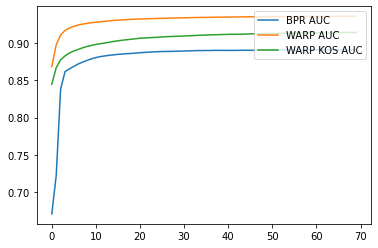

In [5]:
#Plotting results BPR, WARP, WARP KOS AUC ROC
x = np.arange(epochs)
plt.plot(x, np.array(bpr_auc))
plt.plot(x, np.array(warp_auc))
plt.plot(x, np.array(warp_kos_auc))
plt.legend(['BPR AUC', 'WARP AUC', 'WARP KOS AUC'], loc='upper right')
plt.show()

#Weighted Approximate-Rank Pairwise model is the best since it has higher AUC

In [6]:
#BPR precision
model_bpr.fit_partial(train, epochs=70)

train_precision = precision_at_k(model_bpr, train, k=70).mean()
test_precision = precision_at_k(model_bpr, test, k=70, train_interactions=train).mean()
train_auc = auc_score(model_bpr, train).mean()
test_auc = auc_score(model_bpr, test).mean()

print('[BPR] Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('[BPR] AUC: train %.2f, test %.2f.' % (train_auc, test_auc))


[BPR] Precision: train 0.44, test 0.07.
[BPR] AUC: train 0.93, test 0.87.


In [7]:
#WARP precision
model_warp.fit_partial(train, epochs=70)

train_precision = precision_at_k(model_warp, train, k=70).mean()
test_precision = precision_at_k(model_warp, test, k=70, train_interactions=train).mean()
train_auc = auc_score(model_warp, train).mean()
test_auc = auc_score(model_warp, test).mean()

print('[WARP] Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('[WARP] AUC: train %.2f, test %.2f.' % (train_auc, test_auc))


[WARP] Precision: train 0.49, test 0.09.
[WARP] AUC: train 0.96, test 0.91.


In [8]:
#WARP KOS precision
model_warp_kos.fit_partial(train, epochs=70)

train_precision = precision_at_k(model_warp_kos, train, k=70).mean()
test_precision = precision_at_k(model_warp_kos, test, k=70, train_interactions=train).mean()
train_auc = auc_score(model_warp_kos, train).mean()
test_auc = auc_score(model_warp_kos, test).mean()

print('[WARP KOS] Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('[WARP KOS] AUC: train %.2f, test %.2f.' % (train_auc, test_auc))


[WARP KOS] Precision: train 0.49, test 0.09.
[WARP KOS] AUC: train 0.93, test 0.89.


In [9]:
def sample_recommendation(model, data, user_ids):
    n_users, n_items = data['train'].shape
    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()                                    
                          [user_id].indices]
        
        scores = model.predict(user_id, np.arange(n_items))

        top_items = data['item_labels'][np.argsort(-scores)]

        print("User %s" % user_id)
        print("     Known positives:")
        
        for x in known_positives[:3]:
            print("        %s" % x)
        
        print("     Recommended:")
        
        for x in top_items[:3]:
            print("        %s" % x)

In [10]:
#Recomendation with BPR model
sample_recommendation(model_bpr, movielens, [10, 11, 12, 414, 415, 416])

User 10
     Known positives:
        Babe (1995)
        Dead Man Walking (1995)
        Seven (Se7en) (1995)
     Recommended:
        Schindler's List (1993)
        When Harry Met Sally... (1989)
        Apollo 13 (1995)
User 11
     Known positives:
        Get Shorty (1995)
        Mr. Holland's Opus (1995)
        Apollo 13 (1995)
     Recommended:
        Forrest Gump (1994)
        Schindler's List (1993)
        Shawshank Redemption, The (1994)
User 12
     Known positives:
        Toy Story (1995)
        GoldenEye (1995)
        Get Shorty (1995)
     Recommended:
        Full Monty, The (1997)
        Back to the Future (1985)
        Sting, The (1973)
User 414
     Known positives:
        Mr. Smith Goes to Washington (1939)
        Raiders of the Lost Ark (1981)
        Psycho (1960)
     Recommended:
        Magnificent Seven, The (1954)
        Full Monty, The (1997)
        Liar Liar (1997)
User 415
     Known positives:
        Toy Story (1995)
        GoldenEye (199

In [11]:
#Recommendation with WARP model
sample_recommendation(model_warp, movielens, [10,11,12,414,415,416])

User 10
     Known positives:
        Babe (1995)
        Dead Man Walking (1995)
        Seven (Se7en) (1995)
     Recommended:
        Four Weddings and a Funeral (1994)
        Piano, The (1993)
        Ghost (1990)
User 11
     Known positives:
        Get Shorty (1995)
        Mr. Holland's Opus (1995)
        Apollo 13 (1995)
     Recommended:
        Forrest Gump (1994)
        Raiders of the Lost Ark (1981)
        Star Wars (1977)
User 12
     Known positives:
        Toy Story (1995)
        GoldenEye (1995)
        Get Shorty (1995)
     Recommended:
        Air Force One (1997)
        Pulp Fiction (1994)
        Contact (1997)
User 414
     Known positives:
        Mr. Smith Goes to Washington (1939)
        Raiders of the Lost Ark (1981)
        Psycho (1960)
     Recommended:
        Air Force One (1997)
        Star Wars (1977)
        Liar Liar (1997)
User 415
     Known positives:
        Toy Story (1995)
        GoldenEye (1995)
        Get Shorty (1995)
     Recomme

In [12]:
#Recommendation with WARP KOS model
sample_recommendation(model_warp_kos, movielens, [10,11,12,414,415,416])

User 10
     Known positives:
        Babe (1995)
        Dead Man Walking (1995)
        Seven (Se7en) (1995)
     Recommended:
        Grease (1978)
        Four Weddings and a Funeral (1994)
        Schindler's List (1993)
User 11
     Known positives:
        Get Shorty (1995)
        Mr. Holland's Opus (1995)
        Apollo 13 (1995)
     Recommended:
        Forrest Gump (1994)
        Jerry Maguire (1996)
        Silence of the Lambs, The (1991)
User 12
     Known positives:
        Toy Story (1995)
        GoldenEye (1995)
        Get Shorty (1995)
     Recommended:
        In & Out (1997)
        As Good As It Gets (1997)
        Bean (1997)
User 414
     Known positives:
        Mr. Smith Goes to Washington (1939)
        Raiders of the Lost Ark (1981)
        Psycho (1960)
     Recommended:
        Air Force One (1997)
        English Patient, The (1996)
        Liar Liar (1997)
User 415
     Known positives:
        Toy Story (1995)
        GoldenEye (1995)
        Get Shor